In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [82]:
df = pd.read_csv('data_all.csv', sep=';', usecols=['name', 'surname', 'sport', 'start', 'end', 'top', 'reps', 'impr'])
df['impr'] = df['impr'].map(lambda x: float(int(x[:-1])) / 100)
df['reps'] = df['reps'].map(lambda x: int(x[:-1]))
df = df[(df['impr'] < 10) & (df['reps'] < 300) & (df['impr'] > 1.1)]
df.head()

,name,surname,sport,start,end,top,reps,impr
0,Lucie,Halakucová,softball,0.90,1.54,1.95,30,3.20
1,Eliska,Thompsonova,softball,0.68,1.99,2.60,91,4.54
2,Matyáš,Vágner,fotbal golman,0.98,2.14,2.43,45,3.16
3,Charlotte,Velichova,basketbal,1.14,1.61,1.96,18,3.37
4,Simon,Hrubec,hokej golman,0.52,2.16,2.58,88,5.72


In [93]:
df['sport'].value_counts()

hokej                15
softball             10
basketbal             9
fotbal                5
rozhodčí basket       3
hokej golman          3
fotbal golman         3
tenis                 2
CMP                   1
violoncello           1
stolní tenis          1
pozemní hokej         1
sjezdové lyžování     1
florbal               1
baseball              1
MMA                   1
hokej                 1
aikido                1
Name: sport, dtype: int64

### Distribuce zlepšení, opakování a celkový graf

Z datasetu jsem odebral "odlehlé hodnoty" - vzorky s moc odlišnými hodnotami. Ony
pak totiž kurví statistiku. V našem případě to bylo zlepšení přes 1000 %, počet opakování
přes 300 nebo zlepšení pod 110 %

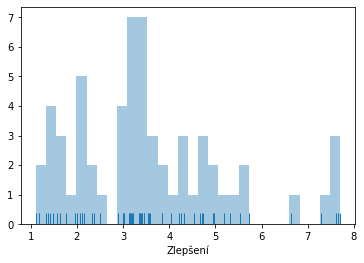

In [83]:
ax = sns.distplot(df['impr'], bins=30, kde=False, rug=True, label='Distribuce zlepšení',
             axlabel='Zlepšení')
ax.get_figure().savefig('zlepseni.png')


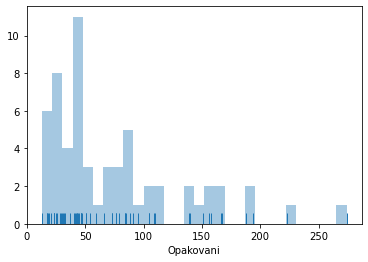

In [84]:
ax = sns.distplot(df['reps'], bins=30, kde=False, rug=True, label='Distribuce opakovani',
             axlabel='Opakovani')
ax.get_figure().savefig('opak.png')


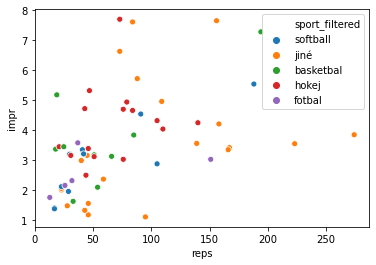

In [85]:
wcs = df['sport'].value_counts()
sports_filtered = df['sport'].map(lambda x:
                                  x if wcs.loc[x] >= 4
                                  else 'jiné')
df['sport_filtered'] = sports_filtered

ax = sns.scatterplot(x=df['reps'], y=df['impr'], hue=df['sport_filtered'])
ax.get_figure().savefig('zlepseni_x_reps.png')
ax

### Zlepšili se ti, kdo to dělali víckrát?

Podle grafu se dá říct, že s počtem opakování zlepšení tak nějak roste, ale
není to úplně jasně vidět. Pearsonův korelační koeficient vychází 0,42
s p-hodnotou 0.00068, což znamená, že to, že by data byla ve skutečnosti nekorelovaná
je extrémně nepravděpodobné.

Vzhledem k tomu, že ani jedna distribuce (opakování ani zlepšení) není
normální (= gausovka), je lepší použít Spearmanův korelační koeficient,
který detekuje jakoukoliv monotónní závislost. Pearson je pouze pro lineární,
tudíž kdyby ta data tvořila třeba parabolu, vyjde Pearson nízký, byť
ta data jednoznačně závislá budou.

Spearman vychází 0,52 s ještě nižší p-hodnotou, můžeme si tedy být docela
jistí, že v datech je nějaká rostoucí závislost, byť ne moc silná

In [86]:
scipy.stats.pearsonr(x=df['reps'], y=df['impr'])

(0.4264386847325134, 0.0006800805759246995)

In [87]:
scipy.stats.spearmanr(a=df['reps'], b=df['impr'])

SpearmanrResult(correlation=0.5210461282925579, pvalue=1.969935578702016e-05)

Zajímavé je porovnání jednotlivých sportů - u hokejek ani basktebalistů
neexistuje signifikantní korelace, kdežto u softbalistů je zcela jasná

(0.24729227949436142, 0.37422567836888193)
SpearmanrResult(correlation=0.23413771637104294, pvalue=0.40095887549141207)


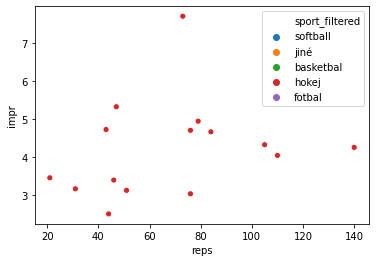

In [96]:
s = 'hokej'
df_sport = df[df['sport'] == s]
ax = sns.scatterplot(x=df_sport['reps'], y=df_sport['impr'], hue=df['sport_filtered'])
ax.get_figure().savefig(f'zlepseni_x_reps_{s}.png')
plt.show(ax)
print(scipy.stats.pearsonr(x=df_sport['reps'], y=df_sport['impr']))
print(scipy.stats.spearmanr(a=df_sport['reps'], b=df_sport['impr']))

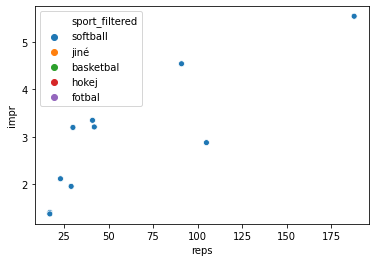

(0.8413838495025128, 0.0022762281116641614)
SpearmanrResult(correlation=0.8510677611520904, pvalue=0.0017911300301950454)


In [97]:
s = 'softball'
df_sport = df[df['sport'] == s]
ax = sns.scatterplot(x=df_sport['reps'], y=df_sport['impr'], hue=df['sport_filtered'])
ax.get_figure().savefig(f'zlepseni_x_reps_{s}.png')
plt.show(ax)
print(scipy.stats.pearsonr(x=df_sport['reps'], y=df_sport['impr']))
print(scipy.stats.spearmanr(a=df_sport['reps'], b=df_sport['impr']))

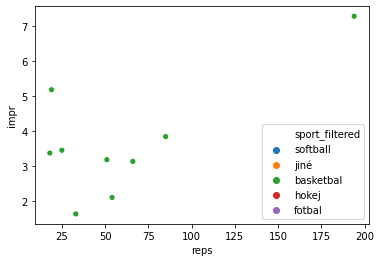

(0.692743266391673, 0.038584368353888225)
SpearmanrResult(correlation=0.13333333333333333, pvalue=0.7323675052362975)


In [98]:
s = 'basketbal'
df_sport = df[df['sport'] == s]
ax = sns.scatterplot(x=df_sport['reps'], y=df_sport['impr'], hue=df['sport_filtered'])
ax.get_figure().savefig(f'zlepseni_x_reps_{s}.png')
plt.show(ax)
print(scipy.stats.pearsonr(x=df_sport['reps'], y=df_sport['impr']))
print(scipy.stats.spearmanr(a=df_sport['reps'], b=df_sport['impr']))
